# YouTube Trending Video Analysis

This is a data analysis project inspired by the Jovian course [Data Analysis with Python: Zero to Pandas](zerotopandas.com) which taught me a great amount of data manipulation and visualization techniques using Python. This is the final project after a great 6-weeks.

For a bit of background, this dataset comes from Kaggle.com and lists video statistics from the YouTube Trending Videos page. It includes data collected daily from November 2017 to June 2018 and across 6 countries. For more information visit the source page here. https://www.kaggle.com/datasnaek/youtube-new

The project uses a variety of functions from the opendatasets, jovian, numnpy, datetime, pandas, matplotlib and seaborn libraries and looks to answer some questions about the YouTube Trending Videos page.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The first few cells will download all of the different portions of this dataset.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasnaek/youtube-new'

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasnaek/youtube-new')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshmorgan9
Your Kaggle Key: ········


  2%|▏         | 5.00M/201M [00:00<00:04, 50.2MB/s]

100%|██████████| 201M/201M [00:02<00:00, 99.0MB/s] 


The dataset has been downloaded and extracted.

In [4]:
data_dir = './youtube-new'

In [5]:
import os
os.listdir(data_dir)

['CAvideos.csv',
 'US_category_id.json',
 'DEvideos.csv',
 'KR_category_id.json',
 'MX_category_id.json',
 'GB_category_id.json',
 'INvideos.csv',
 'MXvideos.csv',
 'JP_category_id.json',
 'FRvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'JPvideos.csv',
 'RUvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'FR_category_id.json',
 'KRvideos.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "youtube-trending-video-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "morgaj6/youtube-trending-video-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/morgaj6/youtube-trending-video-analysis


'https://jovian.ml/morgaj6/youtube-trending-video-analysis'

## Data Preparation and Cleaning

I will begin by cleaning up the datasets. This means removing the unwanted data and columns, combining the datasets and just overall making it easier to work with moving forward.



>First I import the csv datasets and convert them into panda dataframes (df). I will also import the json categories file. Unfourtunately some of the countries data were corrupted and we will only be using Canada, Germany, France, Great Britain, India and the United States. 

Make your pick now which country is the most active on YouTube and keep reading until the end to confirm your guess!

In [7]:
import pandas as pd

ca_raw_df = pd.read_csv(data_dir + '/CAvideos.csv')
de_raw_df = pd.read_csv(data_dir + '/DEvideos.csv')
fr_raw_df = pd.read_csv(data_dir + '/FRvideos.csv')
gb_raw_df = pd.read_csv(data_dir + '/GBvideos.csv')
in_raw_df = pd.read_csv(data_dir + '/INvideos.csv')
us_raw_df = pd.read_csv(data_dir + '/USvideos.csv')

categories = pd.read_json(data_dir + '/CA_category_id.json')

>The next step is to add a location column and add each row's country accordingly.

In [8]:
ca_raw_df['location'] = 'Canada'
de_raw_df['location'] = 'Germany'
fr_raw_df['location'] = 'France'
gb_raw_df['location'] = 'Great Britain'
in_raw_df['location'] = 'India'
us_raw_df['location'] = 'United States'

>Now I will clean up the categories file and create a dictionary that matches the category id with it's title.

In [9]:
cat_items = categories['items']
cat_items = cat_items.to_dict()
cat_dict = {}
for num, info in cat_items.items():
    category = num
    cat_id = info['id']
    snip = info['snippet']
    title = snip['title']
    cat_dict.update({int(cat_id) : title})

cat_dict.update({29: 'other'})
print(cat_dict)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers', 29: 'other'}


>Now I combine the seperate datasets (Canada, France, Great Britain, India, United States) into one.

In [114]:
frames = [ca_raw_df, de_raw_df, fr_raw_df, gb_raw_df, in_raw_df, us_raw_df]
all_raw_df = pd.concat(frames)
all_raw_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,location
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,United States
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,United States
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,United States
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,United States


>Using the dictionary I made, I replace the 'category id' column in the df with the actual title of the category in the dictionary.

In [11]:
all_raw_df = all_raw_df.replace({'category_id':cat_dict})

>This next cell was used to check that the 'comments_disabled', 'ratings_disabled' and 'video_error_or_removed' columns had values other than just False (which they did).

In [12]:
all_raw_df.loc[all_raw_df['comments_disabled'] == True]
all_raw_df.loc[all_raw_df['ratings_disabled'] == True]
all_raw_df.loc[all_raw_df['video_error_or_removed'] == True]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,location
4373,bUjlYfYDoeA,17.05.12,Deleted video,CBCDrama,Entertainment,2017-12-04T17:59:35.000Z,"سابع جار|""مسلسل سابع جار""|""sab3 gar""|""سابع جار...",431929,2545,264,1016,https://i.ytimg.com/vi/wpAmlGiQbiE/default.jpg,False,False,True,مسلسل سابع جار | الحلقة الرابعة والثلاثون | 34...,Canada
10257,4PD8dRaM8Uc,18.04.01,Deleted video,SET India,Entertainment,2018-01-02T17:27:04.000Z,"true events|""extramarital affair""|""fight""|""set...",208914,1026,132,114,https://i.ytimg.com/vi/hbw2IQCRlDk/default.jpg,False,False,True,Click here to subscribe to SonyLIV: http://www...,Canada
10547,LJsbf7KNVCA,18.05.01,Deleted video,Torontomapleleafs951,Sports,2018-01-05T00:16:47.000Z,"Joe Thornton|""fights""|""Nazem Kadri""|""Toronto M...",17584,50,7,45,https://i.ytimg.com/vi/n4YzfOI_LEI/default.jpg,False,False,True,Joe Thornton fights Nazem Kadri - Sharks vs Le...,Canada
12011,7qmSwj8Pwys,18.15.01,Deleted video,PewDiePie,Comedy,2018-01-13T18:46:44.000Z,"pewdiepie|""mad lad""",3954942,344105,7173,31539,https://i.ytimg.com/vi/RkvczNWh9ZM/default.jpg,False,False,True,|AD| Shop and save on the HONOR 7X Lucky Bag p...,Canada
15318,SOeGkrOx0iA,18.31.01,Deleted video,Comedy Central UK,Comedy,2018-01-30T12:20:27.000Z,"comedy central|""comedy central uk""|""the daily ...",426346,5458,332,670,https://i.ytimg.com/vi/ofRoCRKVMrw/default.jpg,False,False,True,President Trump chats with his old pal and Cel...,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33187,1Aoc-cd9eYs,18.07.05,Cobra Kai Ep 2 - Strike First - The Karate Kid...,Cobra Kai,Entertainment,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original S...",672609,4916,197,1269,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,Present day Daniel LaRusso lives a charmed lif...,United States
33414,1Aoc-cd9eYs,18.08.05,Cobra Kai Ep 2 - Strike First - The Karate Kid...,Cobra Kai,Entertainment,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original S...",412323,25441,208,952,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,Present day Daniel LaRusso lives a charmed lif...,United States
33620,1Aoc-cd9eYs,18.09.05,Cobra Kai Ep 2 - Strike First - The Karate Kid...,Cobra Kai,Entertainment,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original S...",251857,6623,231,1120,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,Present day Daniel LaRusso lives a charmed lif...,United States
33837,1Aoc-cd9eYs,18.10.05,Cobra Kai Ep 2 - Strike First - The Karate Kid...,Cobra Kai,Entertainment,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original S...",629055,30695,277,1033,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,Present day Daniel LaRusso lives a charmed lif...,United States


>Now I convert the raw df into a cleaner 'video' df that does'nt include the irrelevant 'video_id' and 'thumbnail_link' columns.

In [13]:
video_df = all_raw_df.drop(columns = ['video_id','thumbnail_link'])
video_df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,location
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,Canada
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,United States
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,False,False,NaN,United States
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,False,I had so much fun transforming Safiyas hair in...,United States
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,False,How Black Panther Should Have EndedWatch More ...,United States


In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "morgaj6/youtube-trending-video-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/morgaj6/youtube-trending-video-analysis


'https://jovian.ml/morgaj6/youtube-trending-video-analysis'

## Exploratory Analysis and Visualization

Now we will begin the analysis section of this project and make some insights about the YouTube Trending page.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [14]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**First, we will look at the general statistics of the numerical columns**

In [15]:
video_df.describe()

,views,likes,dislikes,comment_count
count,2.396620e+05,2.396620e+05,2.396620e+05,2.396620e+05
mean,1.898465e+06,5.218776e+04,2.849046e+03,5.632043e+03
std,8.746280e+06,1.950500e+05,2.703692e+04,2.951592e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.385125e+04,1.277000e+03,7.300000e+01,1.760000e+02
50%,3.082685e+05,6.522000e+03,2.960000e+02,7.910000e+02
75%,1.041631e+06,2.895575e+04,1.126000e+03,3.043000e+03
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [16]:
print('The column with the highest deviation is "views" with a standard deviation of {:.2f}, a mean of {:.2f}, a min of {:.2f} and a max of {:.2f}.'
      .format(video_df['views'].std(),video_df['views'].mean(),video_df['views'].min(),video_df['views'].max()))

The column with the highest deviation is "views" with a standard deviation of 8746279.84, a mean of 1898464.99, a min of 223.00 and a max of 424538912.00.


**Now, we will look at which category was most viewed.**

In [17]:
avg_views_per_cat = video_df.groupby('category_id')[['views']].mean()
avg_views_per_cat = avg_views_per_cat.sort_values('views')
avg_views_per_cat = avg_views_per_cat.reset_index()
avg_views_per_cat

,category_id,views
0,Trailers,7.248000e+03
1,News & Politics,3.956136e+05
2,Education,4.318369e+05
3,Autos & Vehicles,4.766719e+05
4,Travel & Events,5.616806e+05
5,Shows,6.436009e+05
6,Howto & Style,6.625659e+05
7,Pets & Animals,7.268291e+05
8,People & Blogs,7.625862e+05
9,Gaming,9.263545e+05


Text(0, 0.5, 'Views Per Million')

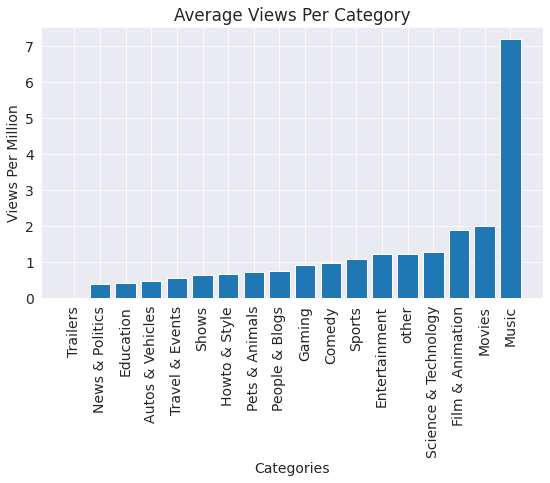

In [18]:
ypos = np.arange(len(avg_views_per_cat['category_id']))

plt.xticks(ypos, avg_views_per_cat['category_id'], rotation='vertical')
plt.bar(ypos, avg_views_per_cat['views']/1e6)
plt.title('Average Views Per Category')
plt.xlabel('Categories')
plt.ylabel('Views Per Million')

It was quite clear that Music is by far the most viewed category out of them all. We can also see that Music is followed by Movies and then Film & Animation.

**Now, we will look at the average amount of video ratings and comments per category.**

In [19]:
avg_likes_per_cat = video_df.groupby('category_id')[['likes']].mean()
avg_likes_per_cat = avg_likes_per_cat.sort_values('likes')
avg_likes_per_cat = avg_likes_per_cat.reset_index()

avg_dislikes_per_cat = video_df.groupby('category_id')[['dislikes']].mean()
avg_dislikes_per_cat = avg_dislikes_per_cat.sort_values('dislikes')
avg_dislikes_per_cat = avg_dislikes_per_cat.reset_index()

avg_comment_count_per_cat = video_df.groupby('category_id')[['comment_count']].mean()
avg_comment_count_per_cat = avg_comment_count_per_cat.sort_values('comment_count')
avg_comment_count_per_cat = avg_comment_count_per_cat.reset_index()

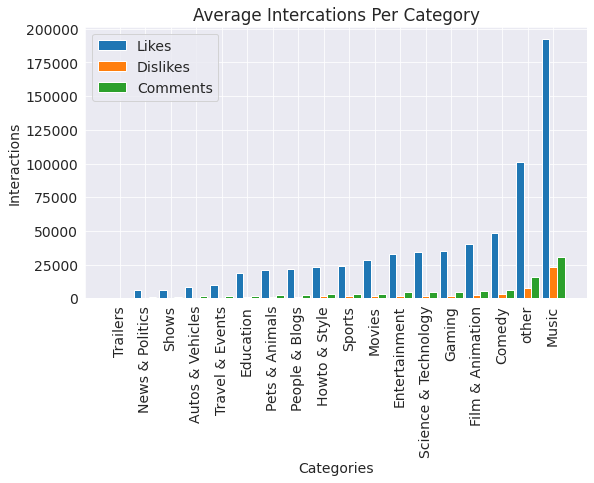

In [20]:
w = 0.3
bar1 = np.arange(len(avg_likes_per_cat['category_id']))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1, avg_likes_per_cat['likes'], w, label='Likes')
plt.bar(bar2, avg_dislikes_per_cat['dislikes'], w, label='Dislikes')
plt.bar(bar3, avg_comment_count_per_cat['comment_count'], w, label='Comments')

plt.title('Average Intercations Per Category')
plt.xlabel('Categories')
plt.ylabel('Interactions')
plt.xticks(bar1+w, avg_likes_per_cat['category_id'], rotation='vertical')
plt.legend()

Again, music is by far the category with the most likes, dislikes and ratings. This time however, the second category with the most interactions is Other, followed by Comedy.

**Now we will identify and look at the top 10 most viewed videos in the entire dataset.**

In [117]:
import datetime as dt

trend_dates_df = video_df.groupby(['title','category_id','location','views']).agg({'trending_date':['min','max']})
trend_dates_df.columns = ['trending_date_start', 'trending_date_end']
trend_dates_df = trend_dates_df.reset_index()
trend_dates_df['trending_date_start']= pd.to_datetime(trend_dates_df['trending_date_start'], format=('%y.%d.%m'))
trend_dates_df['trending_date_end']= pd.to_datetime(trend_dates_df['trending_date_end'], format=('%y.%d.%m'))
trend_dates_df = trend_dates_df.groupby(['title','category_id','location']).agg({'views':'max','trending_date_start':'min','trending_date_end':'max'})
trend_dates_df = trend_dates_df.reset_index()

most_viewed_vids = trend_dates_df.sort_values('views', ascending=False).head(10)
most_viewed_vids


,title,category_id,location,views,trending_date_start,trending_date_end
21144,DAX Mittagsausblick - Verkaufsdruck bleibt hoch,News & Politics,Germany,1460,2017-11-14,2017-11-14
44396,John Oliver - Season 4 Finale,Comedy,Germany,159192,2017-11-14,2017-11-14
6228,ABS-CBN Christmas Station ID 2017 “Just Love N...,Entertainment,Canada,668826,2017-11-14,2017-11-15
25712,Don Diablo ft. A R I Z O N A - Take Her Place ...,Music,Great Britain,1009304,2017-11-14,2017-11-16
17398,Canada's Trudeau charms Manila as he orders fr...,People & Blogs,Canada,30001,2017-11-14,2017-11-14
...,...,...,...,...,...,...
10824,Awalem Khafeya Series - Ep 28 | عادل إمام - HD...,Entertainment,Canada,689779,2018-06-14,2018-06-14
101968,شـاهد رد نوفل العواملة بعد اعلان منح تنظيم مون...,News & Politics,France,198999,2018-06-14,2018-06-14
45378,KEINE VIDEOS MEHR MIT ALTIN BUBBA.,Entertainment,Germany,21848,2018-06-14,2018-06-14
16225,CETTE INVENTION VA VOUS SURPRENDRE !,Entertainment,France,103265,2018-06-14,2018-06-14


Text(0, 0.5, 'Views Per Million')

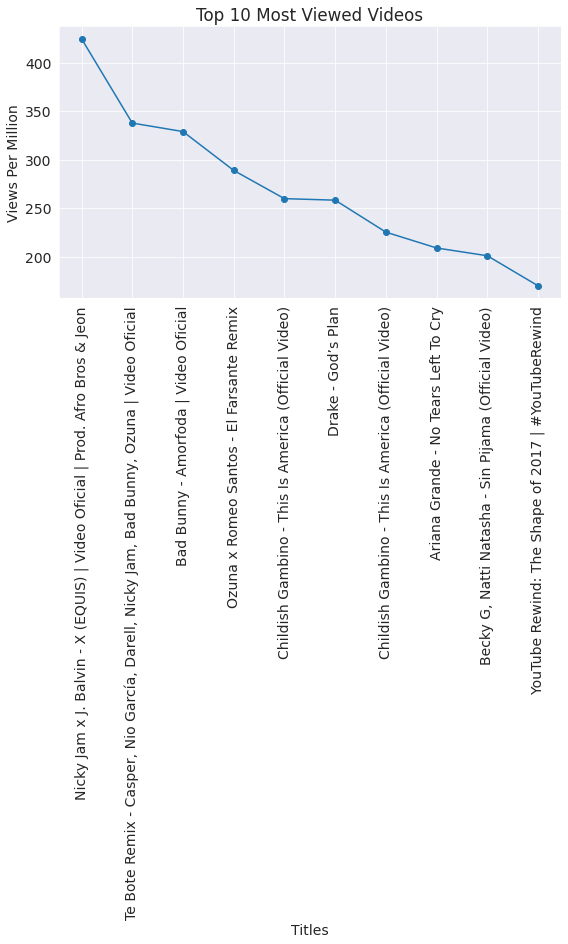

In [22]:
titles_ypos = np.arange(len(most_viewed_vids['title']))

plt.xticks(titles_ypos, most_viewed_vids['title'], rotation='vertical')
plt.plot(titles_ypos, most_viewed_vids['views']/1e6, marker='o')
plt.title('Top 10 Most Viewed Videos')
plt.xlabel('Titles')
plt.ylabel('Views Per Million')

The most viewed video had over 400 Million views and had a lead over the next most viewed by almost 100 million. We can also note that usuprisingly, 9/10 of the top were from the Music category, 9/10 were views from Great Britain and all of the top 10 were trending within 6 months of eachother.

**Now we will look at which countries view which categories the most**

In [23]:
groups = video_df.groupby(['category_id','location'])[['views']].mean()
groups = groups.reset_index()
groups = groups.groupby('location')

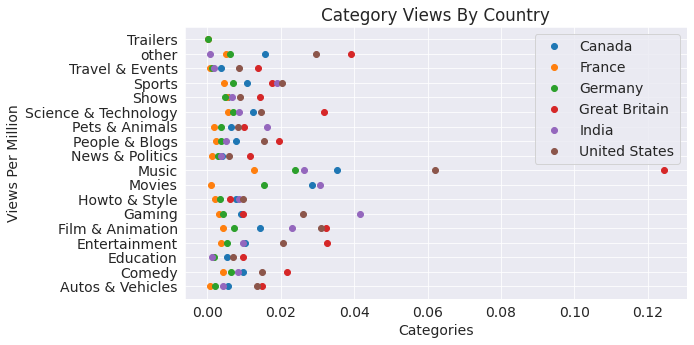

In [24]:
for name, group in groups:
    plt.plot(group['views']/1e8, group['category_id'], marker='o', linestyle='', label=name)

plt.xlabel('Categories')
plt.ylabel('Views Per Million')
plt.title('Category Views By Country')
plt.legend()

**It is quite clear that Great Britain watches the most YouTube as they are the leader in views for almost all categories. The second would be USA.** 

Let us save and upload our work to Jovian before continuing

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "morgaj6/youtube-trending-video-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/morgaj6/youtube-trending-video-analysis


'https://jovian.ml/morgaj6/youtube-trending-video-analysis'

## Asking and Answering Questions

Now using some of the infomation above, we will continue to delve into the data to answer some interesting questions.



### How long do videos generally stay in the trending category?

In [25]:
trend_dates_df #-dataframe from above with only unique video titles (no time-based duplicates that were trending multiple times) and trending start and end time.

,title,category_id,location,views,trending_date_start,trending_date_end
0,Désolé je ne vous avais pas vu ! 😱 👎 ✶ DO 65,Entertainment,France,58267,2018-01-18,2018-01-18
1,KAJAL RAGHWANI SUPERHIT MOVIE ( Full HD 2018...,Film & Animation,India,526046,2017-12-31,2018-01-01
2,"Prêt à tout pour le buzz, Crève la télé-réali...",Film & Animation,France,108487,2018-02-03,2018-02-04
3,जंगली शेर 2018 भोजपुरी की सबसे बड़ी फिल्म P...,Film & Animation,India,1998460,2018-01-01,2018-01-02
4,जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( F...,Film & Animation,India,1292467,2017-12-28,2017-12-30
...,...,...,...,...,...,...
111480,🥂 BUCHE MANGUE VANILLE ~ DESSERT REVEILLON NOU...,Howto & Style,France,3813,2017-12-30,2017-12-30
111481,🥑 Samantha animatrice en grande surface (1) 💛...,Comedy,France,11689,2017-12-18,2017-12-18
111482,🥕 Samantha fait un régime (2) 💛 Samantha Oups !,Comedy,France,10870,2017-12-26,2017-12-26
111483,🦐 Samantha organise un barbecue 💛 Samantha Ou...,Comedy,France,9731,2017-12-28,2017-12-28


In [26]:
trend_dates_df['days_trending'] = trend_dates_df['trending_date_end'] - trend_dates_df['trending_date_start']
trend_dates_df['days_trending'] = trend_dates_df.days_trending.dt.days
trend_dates_df #-added a days trending column

,title,category_id,location,views,trending_date_start,trending_date_end,days_trending
0,Désolé je ne vous avais pas vu ! 😱 👎 ✶ DO 65,Entertainment,France,58267,2018-01-18,2018-01-18,0
1,KAJAL RAGHWANI SUPERHIT MOVIE ( Full HD 2018...,Film & Animation,India,526046,2017-12-31,2018-01-01,1
2,"Prêt à tout pour le buzz, Crève la télé-réali...",Film & Animation,France,108487,2018-02-03,2018-02-04,1
3,जंगली शेर 2018 भोजपुरी की सबसे बड़ी फिल्म P...,Film & Animation,India,1998460,2018-01-01,2018-01-02,1
4,जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( F...,Film & Animation,India,1292467,2017-12-28,2017-12-30,2
...,...,...,...,...,...,...,...
111480,🥂 BUCHE MANGUE VANILLE ~ DESSERT REVEILLON NOU...,Howto & Style,France,3813,2017-12-30,2017-12-30,0
111481,🥑 Samantha animatrice en grande surface (1) 💛...,Comedy,France,11689,2017-12-18,2017-12-18,0
111482,🥕 Samantha fait un régime (2) 💛 Samantha Oups !,Comedy,France,10870,2017-12-26,2017-12-26,0
111483,🦐 Samantha organise un barbecue 💛 Samantha Ou...,Comedy,France,9731,2017-12-28,2017-12-28,0


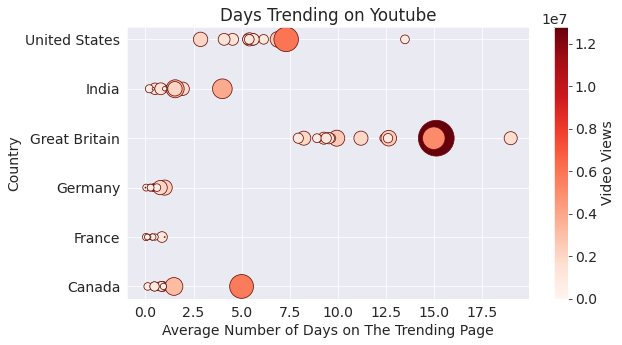

In [27]:
t_groups = trend_dates_df.groupby(['location','category_id'])[['views','days_trending']].mean()
t_groups = t_groups.reset_index()

fig, ax = plt.subplots()
views_scatter_plot = ax.scatter(t_groups['days_trending'],t_groups['location'], s = t_groups['views']*0.0001,
c = t_groups['views'], cmap = plt.cm.Reds, vmin = 0, vmax = t_groups['views'].max(), edgecolor = '#6b0c08', linewidth = 0.75
                               )
ax.set_xlabel('Average Number of Days on The Trending Page')
ax.set_ylabel('Country')
cbar=fig.colorbar(views_scatter_plot)
cbar.set_label('Video Views')
ax.set_title('Days Trending on Youtube')
views_scatter_plot

We used a maplotlib scatter plot with variable bubble sizes and colors. We looked at the average number of days that a video stays on the trending page by country and it is clear that they very largely by region. What's clear between all countries is that the most viewed videos (darker and larger bubbles) stay longer on trending. For most countries the videos will last 1-2.5 days but in the US and GB they can stay on longer ranging from 2.5-18 days. 

### Do the same channels always make it on the trending page or do new channels make it everyday?

In [28]:
#getting rid of time-based duplicates
channel_df = video_df.groupby(['channel_title','title']).agg({'trending_date':['min','max']})
channel_df.columns = ['trending_date_start', 'trending_date_end']
channel_df = channel_df.reset_index()
channel_df['trending_date_start']= pd.to_datetime(channel_df['trending_date_start'], format=('%y.%d.%m'))
channel_df['trending_date_end']= pd.to_datetime(channel_df['trending_date_end'], format=('%y.%d.%m'))
channel_df = channel_df.groupby(['channel_title','title']).agg({'trending_date_start':'min','trending_date_end':'max'})
channel_df = channel_df.reset_index()
#retreiving the count of titles
channel_df = channel_df.groupby(['channel_title'])[['title']].count()
channel_df = channel_df.reset_index()
channel_df

,channel_title,title
0,#AndresSTyle,1
1,#Débloqués,1
2,#Mentale Zuflucht,45
3,#Mind Warehouse,12
4,#SeekingTheTruth,1
...,...,...
17793,특이한동물채널,1
17794,포스트쉐어,1
17795,포크포크,1
17796,활력소TV,1


In [29]:
channel_df.describe()

,title
count,17798.000000
mean,5.331666
std,13.011920
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,256.000000


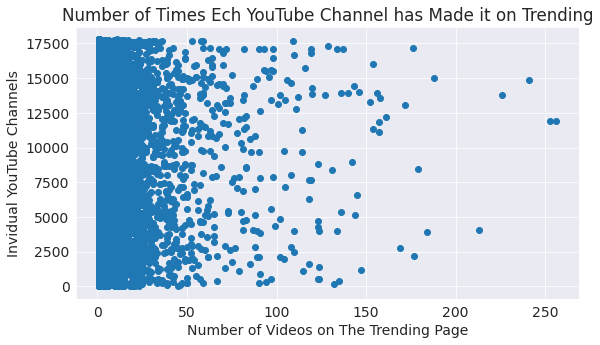

In [30]:
channel_plot = plt.scatter(channel_df['title'], channel_df.index)
plt.xlabel('Number of Videos on The Trending Page')
plt.ylabel('Invidual YouTube Channels')
plt.title('Number of Times Each YouTube Channel has Made it on Trending')
channel_plot

To answer this, we used a matplotlib scatter plot that shows the number of times a channel has had a video on the trending page. The majority of channels fall in the 0-50 range, less often the very popular channels have 50-200 occurrences and even more rarely a super popular channel can have 200-250+ occurrences of a trending video.

### Is there a relationship between the number of views, likes, dislikes, comments, etc?

In [31]:
video_df.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
views,1.000000,0.785601,0.418662,0.506949,-0.007649,-0.004544,0.009438
likes,0.785601,1.000000,0.456083,0.781367,-0.031800,-0.029493,0.008823
dislikes,0.418662,0.456083,1.000000,0.726416,-0.008326,-0.011615,0.006949
comment_count,0.506949,0.781367,0.726416,1.000000,-0.027955,-0.019441,0.004202
comments_disabled,-0.007649,-0.031800,-0.008326,-0.027955,1.000000,0.348749,-0.003857
ratings_disabled,-0.004544,-0.029493,-0.011615,-0.019441,0.348749,1.000000,-0.002902
video_error_or_removed,0.009438,0.008823,0.006949,0.004202,-0.003857,-0.002902,1.000000


<AxesSubplot:>

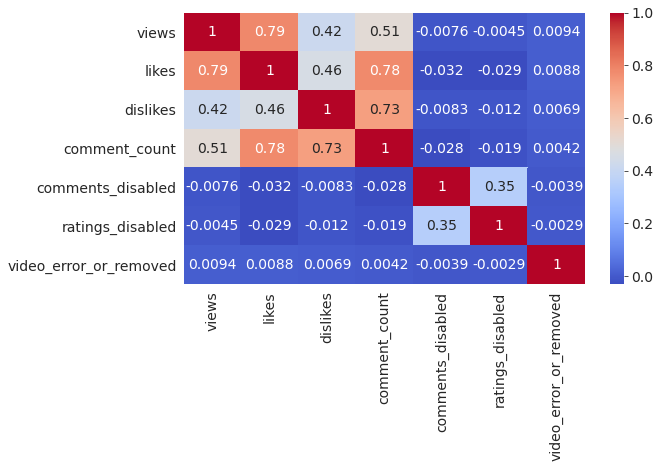

In [32]:
sns.heatmap(video_df.corr(), annot=True, cmap='coolwarm')

In [58]:
likes_m_df = video_df.groupby(['category_id'])[['likes']].mean()
likes_m_df = likes_m_df.reset_index()
likes_std_df = video_df.groupby(['category_id'])[['likes']].std()
likes_std_df = likes_std_df.reset_index()

views_df = video_df.groupby(['category_id'])[['views']].mean()
views_df = views_df.reset_index()
views_std_df = video_df.groupby(['category_id'])[['views']].std()
views_std_df = views_std_df.reset_index()

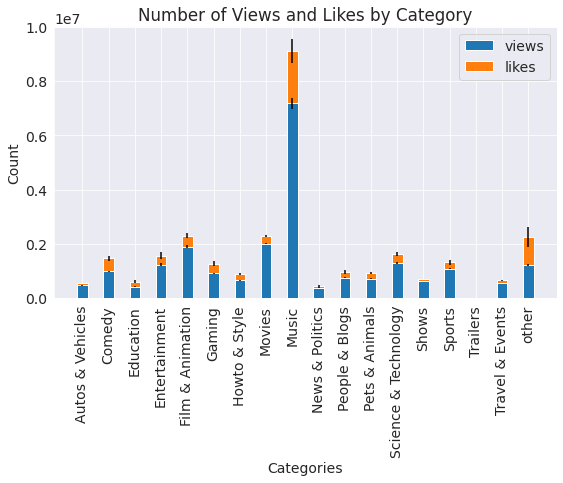

In [107]:
pos = views_df['category_id']
w = 0.4
fig, ax = plt.subplots()
ax.bar(pos, views_df['views'], w, yerr=views_std_df['views']/100, label='views')
ax.bar(pos, likes_m_df['likes']*10, w, yerr=likes_std_df['likes'], bottom=views_df['views'], label='likes')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_title('Number of Views and Likes by Category')
plt.xticks(rotation='vertical')
ax.legend()

The seaborn variable correlation heat mab showed us that the number of likes are a relatively good predictor for the number of views a video will get. As depicted above, when we look at each catgeory using a matplotlib stacked bar graph to create a histogram, the larger mean view bars match to the larger mean like bars. The black line above the bars indicate the standard deviation of views and likes by category which have been scaled down to reflect that they deviate quite similarly.

### What types of videos should you post to get on the YouTube trending page?

In [99]:
gb_trend_df = trend_dates_df.loc[trend_dates_df['location']=='Great Britain']
gb_trend_df

,title,category_id,location,views,trending_date_start,trending_date_end,days_trending
54,#21 How to go FAST!!! Coaching famous youtuber...,Sports,Great Britain,16074,2017-11-14,2017-11-16,2
164,#ConanHaiti Preview: Haitians Roast Trump - C...,Comedy,Great Britain,528163,2018-01-24,2018-02-05,12
198,#GameOn - 88 Seconds of Video Games,Gaming,Great Britain,454088,2018-03-15,2018-03-25,10
212,#KIISCampus Surprise with BTS | On Air with Ry...,Entertainment,Great Britain,156896,2017-11-18,2017-11-29,11
238,#Laurel? #Yanny? Or...,News & Politics,Great Britain,722366,2018-05-20,2018-06-03,14
...,...,...,...,...,...,...,...
110877,인피니트(INFINITE) Tell Me Teaser #D-6. SUNGKYU,Entertainment,Great Britain,121549,2018-01-05,2018-01-05,0
110886,청하 (CHUNGHA) - Roller Coaster MV,Music,Great Britain,5855069,2018-01-18,2018-02-07,20
110905,한국 컵라면+소주를 처음 먹어본 동계올림픽 전설들의 반응!,Comedy,Great Britain,1551558,2018-02-08,2018-03-14,34
111114,🔥 'Avengers: Infinity War' Cast Answer Your B...,Entertainment,Great Britain,884833,2018-05-10,2018-05-20,10


In [103]:
gb_trend_df = gb_trend_df.groupby(['category_id']).agg({'views':'mean','days_trending':'mean'})
gb_trend_df = gb_trend_df.reset_index()
gb_trend_df

,category_id,views,days_trending
0,Autos & Vehicles,1.457632e+06,9.285714
1,Comedy,1.972539e+06,8.236967
2,Education,7.807720e+05,12.421053
3,Entertainment,2.559694e+06,9.952489
4,Film & Animation,2.434032e+06,12.656716
5,Gaming,8.205814e+05,9.662857
6,Howto & Style,4.596539e+05,9.030000
7,Music,1.278911e+07,15.128571
8,News & Politics,7.739442e+05,8.921875
9,People & Blogs,1.268991e+06,9.539249


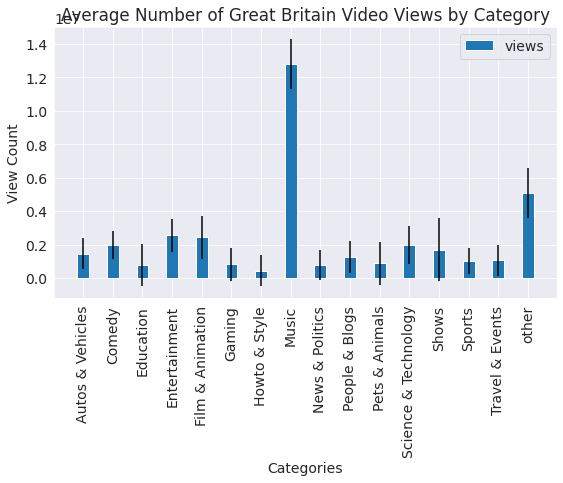

In [109]:

w = 0.4
fig, ax = plt.subplots()
ax.bar(gb_trend_df['category_id'], gb_trend_df['views'], w, yerr=gb_trend_df['days_trending']*100000, label='views')
ax.set_xlabel('Categories')
ax.set_ylabel('View Count')
ax.set_title('Average Number of Great Britain Video Views by Category')
plt.xticks(rotation='vertical')
ax.legend()

As we itentified earlier, the most viewed country in this database is Great Britain for all categories. Therefore, we've looked at which category is most viewed for this regoion which is unsurprisingly Music by a large margin. We can also observe that although Shows have the longest average time on the trending page at 19 days, the second highest is Music with 15. Therefore, we can determine that your best chance to end up with a viral video on the trending page would be to post a Music video in Great Britain.

Let us save and upload our work to Jovian before continuing.

In [118]:
import jovian

In [119]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "morgaj6/youtube-trending-video-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/morgaj6/youtube-trending-video-analysis


'https://jovian.ml/morgaj6/youtube-trending-video-analysis'

## Inferences and Conclusion

If you made it this far you should have realized that Great Britain is by far the most active country from this dataset on all aspects of the YouTube platform. This may come as a surprise considering that they would only have been the 4th most populous country on this list after India, USA and Germany. They, along with the rest of the world favour the Music category which can claim the most amount of views, likes, comments and even dislikes. 

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

In the future, I will continue this analysis to confirm if Great Britain is still the most active with more up-to-date data. It will also be interesting to include more countries to confirm if these findings still hold true. Especially if I could include international data from all continents. I would particularly like to compare this data with some of the more technologically advanced Asian countries like China and Japan which I would predict have very high numbers in the views, likes and dislikes columns. 

Thank you for reading!

Key References:
* https://seaborn.pydata.org/
* https://matplotlib.org/
* https://pandas.pydata.org/
* https://jamesrledoux.com/code/group-by-aggregate-pandas
* A lot of https://stackoverflow.com/

In [122]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
